# Report the experiment consensus algorithm

### Import modules of consensus algorithm

In [97]:
from consensus.PBFT_Simulator import PBFT_Simulator
from consensus.QPBFT_Simulator import QPBFT_Simulator
from consensus.Proposed_Simulator import Proposed_Simulator
import time
import numpy

In [98]:
def evaluation_pbft(num_request:int, num_nodes:int, num_faulty:int):
    consensus = PBFT_Simulator(num_nodes, num_faulty)
    start = time.time()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.time()
    delay = (end-start) * 1000
    num_success = consensus.success_proof
    del consensus
    
    return (delay, num_success)

def evaluation_qpbft(num_request:int, num_managing:int, num_voting:int, num_faulty:int):
    consensus = QPBFT_Simulator(num_managing, num_voting, num_faulty)
    
    start = time.time()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.time()
    delay = (end-start) * 1000
    num_success = consensus.success_proof
    del consensus
    
    return (delay, num_success)

def evaluation_proposed_scheme(num_request:int, num_master:int, num_slave:int,  num_random:int, num_faulty:int):
    consensus = Proposed_Simulator(num_master, num_slave, num_random, num_faulty)
    start = time.time()
    for i in range(num_request):
        consensus.send_request(f"Hello world {i}")
    end = time.time()
    delay = (end-start) * 1000
    num_success = consensus.success_proof
    del consensus
    
    return (delay, num_success)

In [99]:
num_requests = numpy.array([i for i in range(10, 301, 10)])
LENGTH = num_requests.shape[0]

In [100]:
delays_pbft = numpy.array([])
proability_pbft = numpy.array([])

for i in range(LENGTH):
    result = evaluation_pbft(num_requests[i], 10, 2)
    delays_pbft = numpy.append(delays_pbft, result[0])
    proability_pbft = numpy.append(proability_pbft, result[1]/(num_requests[i] * 1.0))

Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful

In [101]:
delays_qpbft = numpy.array([])
proability_qpbft = numpy.array([])

for i in range(LENGTH):
    result = evaluation_qpbft(num_requests[i], 6, 4, 2)
    delays_qpbft = numpy.append(delays_qpbft, result[0])
    proability_qpbft = numpy.append(proability_qpbft, result[1]/(num_requests[i] * 1.0))

Successful
Fail
Successful
Fail
Fail
Successful
Fail
Fail
Successful
Fail
Successful
Successful
Successful
Successful
Fail
Fail
Fail
Successful
Successful
Successful
Successful
Successful
Fail
Fail
Fail
Successful
Fail
Fail
Fail
Fail
Successful
Fail
Successful
Fail
Successful
Successful
Successful
Fail
Successful
Fail
Fail
Successful
Fail
Fail
Successful
Successful
Successful
Successful
Fail
Fail
Fail
Fail
Fail
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Fail
Successful
Successful
Successful
Successful
Fail
Fail
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Fail
Fail
Fail
Successful
Successful
Successful
Successful
Fail
Fail
Fail
Successful
Successful
Successful
Fail
Successful
Successful
Fail
Fail
Successful
Successful
Successful
Successful
Fail
Successful
Successful
Successful
Fail
Fail
Successful
Successful
Successful
Successful
Fail
Fail
Fail
Fail
Successful
Successful
Fail
Successful
Successful
Fail
Fail
Fail
Fai

In [102]:
delays_proposed = numpy.array([])
proability_proposed = numpy.array([])

for i in range(LENGTH):
    result = evaluation_proposed_scheme(num_requests[i], 6, 4, 5, 2)
    delays_proposed = numpy.append(delays_proposed, result[0])
    proability_proposed = numpy.append(proability_proposed, result[1]/(num_requests[i] * 1.0))

Successful
Fail
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Fail
Successful
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Fail
Fail
Successful
Fail
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Fail
Successful
Successful
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Fail
Successful
Fail
Successful
Fail
Successful
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Fail
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Fail
Successful
Successful
Successful
Successful
Successful
Successful
Successful
Successf

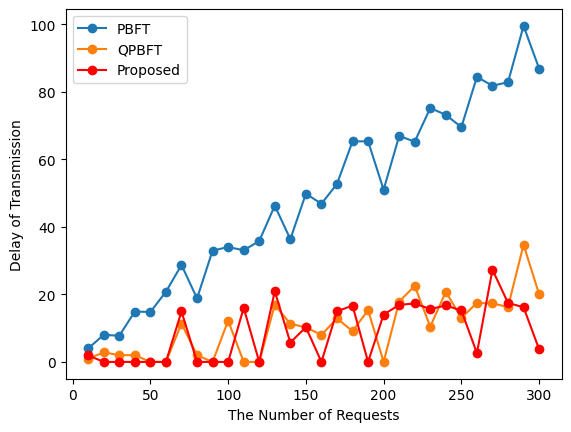

In [103]:
import matplotlib.pyplot as plot

plot.plot(num_requests, delays_pbft, label = "PBFT", marker="o")
plot.plot(num_requests, delays_qpbft, label = "QPBFT", marker="o")
plot.plot(num_requests, delays_proposed, label = "Proposed", color="red", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("Delay of Transmission")
plot.show()

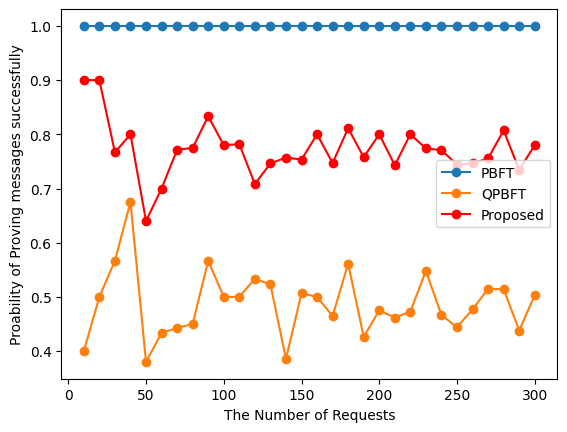

In [104]:
plot.plot(num_requests, proability_pbft, label = "PBFT", marker="o")
plot.plot(num_requests, proability_qpbft, label = "QPBFT", marker="o")
plot.plot(num_requests, proability_proposed, label = "Proposed", color="red", marker="o")
plot.legend()
plot.xlabel("The Number of Requests")
plot.ylabel("Proability of Proving messages successfully")
plot.show()